In [1]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier, Perceptron, PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression 
data2 = pd.read_csv("UHG_SAS_bds_anu1.csv")
data1 = pd.DataFrame(pd.read_csv("d.csv")[['MEDICARE_HICN_CD','pxcreatedate']])
#data1 = data[:,[6,7,11,25,26,27,54,55,56,57,58,59,60,67,68,69,70,71,207,208,209,210,362,363,364,365,366]]

data = pd.merge(data2,data1, on ="MEDICARE_HICN_CD", how ="left")

data.columns
data1.shape, data2.shape, data.shape

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


((67903, 2), (65808, 9), (67903, 10))

In [2]:
data.loc[:,'pxcreatedate']
data['year'] = pd.DatetimeIndex(data['pxcreatedate']).year
data['month'] = pd.DatetimeIndex(data['pxcreatedate']).month
grouped =data.groupby('month').size()
#grouped

"""2     4509
3     7667
4     6476
5     7117
6     6952
7     6086
8     6503
9     4428
10    6936
11    6824
12    4405
"""
data.columns


data = data.replace(np.NaN,0)

print(data.isnull().sum())
data.columns
data1 = data.iloc[:,np.r_[1:9,10:12]]
data1.columns
print(data1.isnull().sum(), data1.shape)

MEDICARE_HICN_CD            0
f_optim                     0
n_180_bcs_opt               0
n_360_bcs_refuse_olt        0
age_imp                     0
TOT_RX_CLM_90_imp           0
MM_HH_n_21_a4m_assist_m     0
f_spanish                   0
HH_n_360_a4m_opt_sum_add    0
pxcreatedate                0
year                        0
month                       0
dtype: int64
f_optim                     0
n_180_bcs_opt               0
n_360_bcs_refuse_olt        0
age_imp                     0
TOT_RX_CLM_90_imp           0
MM_HH_n_21_a4m_assist_m     0
f_spanish                   0
HH_n_360_a4m_opt_sum_add    0
year                        0
month                       0
dtype: int64 (67903, 10)


In [3]:
print(data1.groupby('f_optim').size())

#data1 = data.iloc[:,np.r_[9,11,21,22,25:31,35,38:42,52:200]][data.month <=7]
data11 = data1[data1.month <=7]
data2 = data1[data1.month ==8]
data3 = data1[(data1.month >=8) & (data1.month <=9)]
data4 = data1[(data1.month >=8) & (data1.month <=10)]
data5 = data1[(data1.month >=8) & (data1.month <=11)]
data6 = data1[(data1.month >=8) & (data1.month <=12)]
data11.shape, data2.shape
#data1.columns



f_optim
0    63862
1     4041
dtype: int64


((38807, 10), (6503, 10))

In [31]:
####Model built 
from sklearn.neural_network import MLPClassifier 
from sklearn import preprocessing
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import KFold
from sklearn import datasets,linear_model,metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

###Main Training data
train_X1, test_X1, train_Y1, test_Y1 = train_test_split(data11.iloc[:,1:], data11.iloc[:,0],test_size = 0.3)
###Incremental Data
train_X2, test_X2, train_Y2, test_Y2 = train_test_split(data2.iloc[:,1:], data2.iloc[:,0],test_size = 0.3)
train_X3, test_X3, train_Y3, test_Y3 = train_test_split(data3.iloc[:,1:], data3.iloc[:,0],test_size = 0.3)
train_X4, test_X4, train_Y4, test_Y4 = train_test_split(data4.iloc[:,1:], data4.iloc[:,0],test_size = 0.3)
train_X5, test_X5, train_Y5, test_Y5 = train_test_split(data5.iloc[:,1:], data5.iloc[:,0],test_size = 0.3)
train_X6, test_X6, train_Y6, test_Y6 = train_test_split(data6.iloc[:,1:], data6.iloc[:,0],test_size = 0.3)

#### combined 30%-30% of both mini batches
comb_X2,comb_Y2 = test_X1.append(test_X2), test_Y1.append(test_Y2)
comb_X3,comb_Y3 = test_X1.append(test_X3), test_Y1.append(test_Y3)
comb_X4,comb_Y4 = test_X1.append(test_X4), test_Y1.append(test_Y4)
comb_X5,comb_Y5 = test_X1.append(test_X5), test_Y1.append(test_Y5)
comb_X6,comb_Y6 = test_X1.append(test_X6), test_Y1.append(test_Y6)

train_X11 = preprocessing.scale(train_X1)
test_X11 = preprocessing.scale(test_X1)

params = {
    "loss" : ['log'],
    "alpha" : [1e-4,1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3,1e4],
    "penalty" : ['l2'],
    "n_iter" :[1000]
}
      
clf = SGDClassifier()
clf = GridSearchCV(clf, param_grid=params)
clf1 = clf.fit(train_X1,train_Y1)
print(clf1.best_estimator_, clf1.best_score_)

clf2 =clf.fit(train_X11,train_Y1)
print(clf2.best_estimator_, clf2.best_score_)

###accuracy of train and test of mini batch 1
print("Accuracy for (train,test)-" , accuracy_score(train_Y1,clf1.predict(train_X1)), accuracy_score(test_Y1,clf1.predict(test_X1)))
print("Confusion Matrix for Mini Batch1-", confusion_matrix(test_Y1,clf1.predict(test_X1)))

###accuracy of train and test of mini batch 1
print("Accuracy for (train,test)-" , accuracy_score(train_Y1,clf2.predict(train_X11)), accuracy_score(test_Y1,clf2.predict(test_X11)))
print("Confusion Matrix for Mini Batch1-", confusion_matrix(test_Y1,clf2.predict(test_X11)))


SGDClassifier(alpha=10.0, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', n_iter=1000, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False) 0.933109998527
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', n_iter=1000, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False) 0.934435281991
Accuracy for (train,test)- 0.929796789869 0.935669500988
Confusion Matrix for Mini Batch1- [[10884    43]
 [  706    10]]
Accuracy for (train,test)- 0.934361655132 0.938933264623
Confusion Matrix for Mini Batch1- [[10909    18]
 [  693    23]]


In [42]:
###Normalization 
##Oversampling 
#hyperparameter tuning 
clf.get_params().keys()
pd.DataFrame(test_Y1).groupby('f_optim').size()

f_optim
0    10927
1      716
dtype: int64

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed:  3.4min remaining:  6.9min
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:  4.5min remaining:  5.6min
[Parallel(n_jobs=-1)]: Done   5 out of   9 | elapsed:  4.5min remaining:  3.6min
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:  4.5min remaining:  2.2min
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:  4.5min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  4.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  4.6min finished


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  4.8min finished


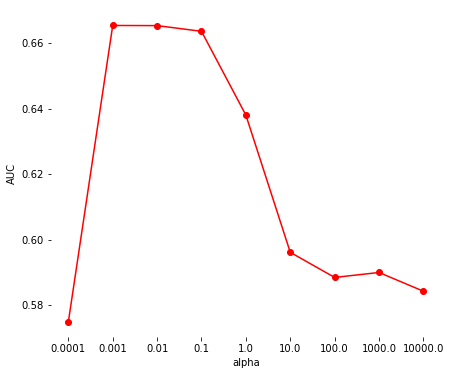

SGDClassifier(alpha=0.001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', n_iter=1000, n_jobs=-1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False) 0.665390059373


In [134]:
###Hyperparameter tuning 

##pip install parfit - anaconda
from sklearn.model_selection import ParameterGrid
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score

from parfit import bestFit
import parfit as pf

model =SGDClassifier()
grid ={ 
'alpha' : [1e-4,1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3,1e4], #learning rate 
'n_iter': [1000], #epoch
'loss'  : ['log'], #logistic regression 
'penalty':['l2'], 
'n_jobs': [-1]
}
paramGrid = ParameterGrid(grid)


bestModel, bestScore, allModels, allScores = pf.bestFit(model, paramGrid, train_X1, train_Y1, test_X1, test_Y1, 
                                                        metric = roc_auc_score, greater_is_better = True, scoreLabel = "AUC")

print(bestModel, bestScore)

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed:  3.9min remaining:  7.8min
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:  4.9min remaining:  6.2min
[Parallel(n_jobs=-1)]: Done   5 out of   9 | elapsed:  4.9min remaining:  3.9min
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:  4.9min remaining:  2.5min
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:  4.9min remaining:  1.4min
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  5.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  5.0min finished


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  4.3min finished


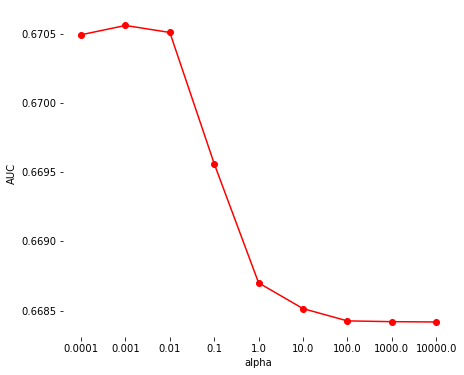

SGDClassifier(alpha=0.001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', n_iter=1000, n_jobs=-1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False) 0.670561248775


In [135]:

bestModel1, bestScore1, allModels1, allScores1 = pf.bestFit(model, paramGrid, train_X11, train_Y1, test_X11, test_Y1, 
                                                        metric = roc_auc_score, greater_is_better = True, scoreLabel = "AUC")

print(bestModel1, bestScore1)



In [136]:

print("Accuracy for (train,test)-" , accuracy_score(train_Y1,bestModel.predict(train_X1)), accuracy_score(test_Y1,bestModel.predict(test_X1)))
print("Confusion Matrix for Mini Batch1-", confusion_matrix(test_Y1,bestModel.predict(test_X1)))


print("Accuracy for (train,test)-" , accuracy_score(train_Y1,bestModel.predict(train_X11)), accuracy_score(test_Y1,bestModel.predict(test_X11)))
print("Confusion Matrix for Mini Batch1-", confusion_matrix(test_Y1,bestModel.predict(test_X11)))


Accuracy for (train,test)- 0.933073185098 0.938503822039
Confusion Matrix for Mini Batch1- [[10927     0]
 [  716     0]]
Accuracy for (train,test)- 0.676225887204 0.672678862836
Confusion Matrix for Mini Batch1- [[7416 3511]
 [ 300  416]]


In [137]:
#### Incremental for 1 month
print(pd.DataFrame(comb_Y2).groupby('f_optim').size())
bestModel.partial_fit(train_X2,train_Y2)
###accuracy of train and test of mini batch 2
print("Accuracy with Mini Batch2 (train,test)-" , accuracy_score(train_Y2,bestModel.predict(train_X2)), accuracy_score(test_Y2,bestModel.predict(test_X2)))
print(confusion_matrix(comb_Y2,bestModel.predict(comb_X2)))

train_X21 = preprocessing.scale(train_X2)
test_X21 = preprocessing.scale(test_X2)

comb_X21 = preprocessing.scale(comb_X2)

bestModel1.partial_fit(train_X21,train_Y2)
###accuracy of train and test of mini batch 2
print("Accuracy with Mini Batch2 (train,test)-" , accuracy_score(train_Y2,bestModel.predict(train_X21)), accuracy_score(test_Y2,bestModel.predict(test_X21)))
confusion_matrix(comb_Y2,bestModel.predict(comb_X21))
print(bestModel1.coef_)
#print(clf)

f_optim
0    12764
1      830
dtype: int64
Accuracy with Mini Batch2 (train,test)- 0.937829525483 0.938493080472
[[12717    47]
 [  819    11]]
Accuracy with Mini Batch2 (train,test)- 0.637961335677 0.637621732445
[[ 0.06543289 -0.10947792 -0.09263107  0.11547326  0.18088165  0.06550299
   0.45758082  0.          0.06672504]]


In [138]:
train_X31 = preprocessing.scale(train_X3)
test_X31 = preprocessing.scale(test_X3)
comb_X31 = preprocessing.scale(comb_X3)

#### Incremental for 2 month
bestModel1.partial_fit(train_X3,train_Y3)
###accuracy of train and test of mini batch 2
print("Accuracy with Mini Batch2 (train,test)-" , accuracy_score(train_Y3,bestModel1.predict(train_X3)), accuracy_score(comb_Y3,bestModel1.predict(comb_X3)))
confusion_matrix(comb_Y3,bestModel1.predict(comb_X3))
print(bestModel1.coef_)

Accuracy with Mini Batch2 (train,test)- 0.940792053326 0.939154325538
[[ 0.06556165 -0.10999906 -0.11190944  0.16746426  0.18173223  0.06577893
   0.47384731 -0.06167591  0.06686592]]


In [139]:
train_X41 = preprocessing.scale(train_X4)
test_X41 = preprocessing.scale(test_X4)
comb_X41 = preprocessing.scale(comb_X4)

#### Incremental for 2 month
bestModel1.partial_fit(train_X4,train_Y4)
###accuracy of train and test of mini batch 2
print("Accuracy with Mini Batch2 (train,test)-" , accuracy_score(train_Y4,bestModel1.predict(train_X4)), accuracy_score(comb_Y4,bestModel1.predict(comb_X4)))
confusion_matrix(comb_Y4,bestModel1.predict(comb_X4))
print(bestModel1.coef_)

Accuracy with Mini Batch2 (train,test)- 0.941787941788 0.942013643849
[[ 0.06597285 -0.11079439 -0.15788909  0.25374606  0.18260491  0.06670494
   0.49235024 -0.06162843  0.06521694]]


In [140]:
train_X51 = preprocessing.scale(train_X5)
test_X51 = preprocessing.scale(test_X5)
comb_X51 = preprocessing.scale(comb_X5)

#### Incremental for 2 month
bestModel1.partial_fit(train_X5,train_Y5)
###accuracy of train and test of mini batch 2
print("Accuracy with Mini Batch2 (train,test)-" , accuracy_score(train_Y5,bestModel1.predict(train_X5)), accuracy_score(comb_Y5,bestModel1.predict(comb_X5)))
confusion_matrix(comb_Y5,bestModel1.predict(comb_X5))
print(bestModel1.coef_)

Accuracy with Mini Batch2 (train,test)- 0.948504310594 0.939793186709
[[ 0.0665558  -0.11204723 -0.20544914  0.34724036  0.18335268  0.06684636
   0.51335625 -0.06117577  0.06414826]]


In [141]:
train_X61 = preprocessing.scale(train_X6)
test_X61 = preprocessing.scale(test_X6)
comb_X61 = preprocessing.scale(comb_X6)

#### Incremental for 2 month
bestModel1.partial_fit(train_X6,train_Y6)
###accuracy of train and test of mini batch 2
print("Accuracy with Mini Batch2 (train,test)-" , accuracy_score(train_Y6,bestModel1.predict(train_X6)), accuracy_score(comb_Y6,bestModel1.predict(comb_X6)))
confusion_matrix(comb_Y6,bestModel1.predict(comb_X6))
print(bestModel1.coef_)

Accuracy with Mini Batch2 (train,test)- 0.948593312712 0.94222462203
[[ 0.06727732 -0.11343253 -0.25391295  0.45338488  0.18402356  0.06753098
   0.53416506 -0.05969367  0.05525568]]


In [ ]:
train_X1.iloc[:,5:].describe
dir(clf.fit)



In [ ]:
string1 ="ald"
string2 ="dsf"
def d(string1,string2):
    ls1 =list(string1)
    ls2 =list(string2)
    if (ls1==ls2):
        print("anagram")
d(string1,string2)   